# Logistic Regression #

> Declare features and target

In [50]:
# import modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [52]:
# read csv file to a pandas dataframe
df = pd.read_csv("online_shoppers_intention_v1.1.csv")

> Split the data

In [53]:
# ---------------------------------------------------------------------------------------------------
# Extract needed features as a list of columns 
# excluding target variable 'Revenue' and original object features (that were labelencoded), namely 'Month' and VisitorType'
# ---------------------------------------------------------------------------------------------------
## create a list of all the columns
list_all_columns = df.columns.tolist()

## remove features in list, which are not needed for testing for feature selection, namely:
list_remove_features = ['Month', 'VisitorType', 'Revenue'] 

# Create sets of a,b
setA = set(list_all_columns)
setB = set(list_remove_features)

# Get new set with elements that are only in a but not in b
setlist_X_columns = setA.difference(list_remove_features)

# convert set object to a list
list_X_columns = list(setlist_X_columns)

# Define dependent variables
X = df[list_X_columns].to_numpy()

#show the columns that need to be included as features
## sort alphabetically
list_X_columns.sort()
## show list 
list_X_columns

['Administrative',
 'Administrative_Duration',
 'BounceRates',
 'Browser',
 'ExitRates',
 'Informational',
 'Informational_Duration',
 'Month_lbl',
 'OperatingSystems',
 'PageValues',
 'ProductRelated',
 'ProductRelated_Duration',
 'Region',
 'SpecialDay',
 'TrafficType',
 'VisitorType_lbl',
 'Weekend']

In [40]:
# Define Features and Target variables
X = df[list_X_columns]
Y = df['Revenue']

In [41]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

> Model Development and Prediction

In [42]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=100)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


> Model Evaluation Using Confusion Matrix

In [43]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[3036,   95],
       [ 366,  202]])

> Vizualizing Confusion Matrix Using Heatmap

In [44]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

Text(0.5,257.44,'Predicted label')

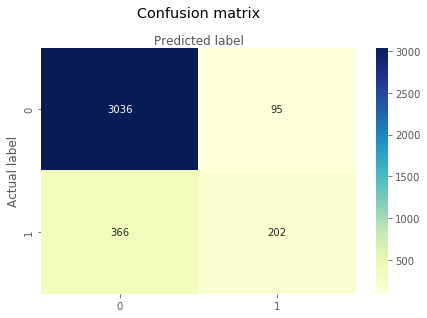

In [45]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

> Confusion Matrix Evaluation

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8753717220870506
Precision: 0.6801346801346801
Recall: 0.35563380281690143


> ROC Curve

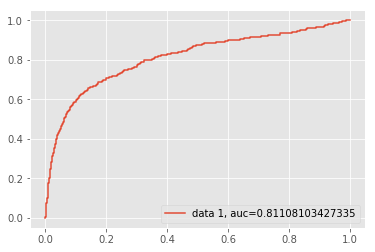

In [47]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

target_names = ['0', '1']

# print the classification report
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3131
           1       0.68      0.36      0.47       568

    accuracy                           0.88      3699
   macro avg       0.79      0.66      0.70      3699
weighted avg       0.86      0.88      0.86      3699

